Ide :
1. Lakukan Object Detection pada Image
*   Gaussian Blur
*   Gradient Calculaton
*   Non Maximum Suppression
*   Image Low-High Tresholding
*   Edge Detection

2. 



In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as url
from google.colab.patches import cv2_imshow

# Tahapan

## Gambar

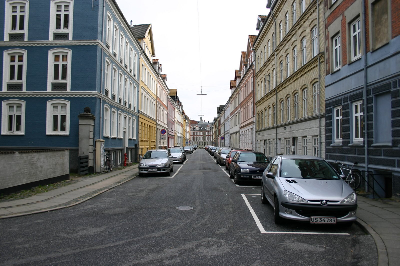

In [ ]:
link = "https://images.freeimages.com/images/large-previews/2f1/street-1512854.jpg"

img =url.urlopen(link)

# convert to numpy array
img = np.asarray(bytearray(img.read()), dtype="uint8")

img = cv.imdecode(img,1)
img = cv.resize(img,None,fx=0.25, fy=0.25, interpolation = cv.INTER_CUBIC)
cv2_imshow(img)

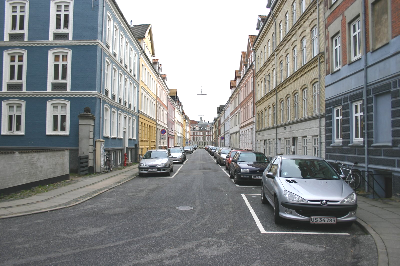

In [ ]:
#Brightness
img = np.array(img)

for height in range(len(img)):
  for width in range(len(img[height])):
    for color in range(len(img[height,width])):
      if (img[height,width,color] + 30) > 255:
        img[height,width,color] = 255
      else:
        img[height,width,color] += 30

cv2_imshow(img)

In [ ]:
# #Darkness
# img = np.array(img)

# for height in range(len(img)):
#   for width in range(len(img[height])):
#     for color in range(len(img[height,width])):
#       if (img[height,width,color] - 30) < 0:
#         img[height,width,color] = 0
#       else:
#         img[height,width,color] -= 30

# cv2_imshow(img)

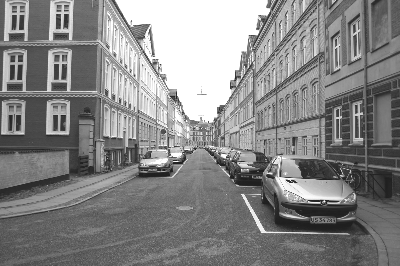

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ori = img
cv2_imshow(img)

## Gaussian Blur

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

Cara kerja gaussian_kernel sama seperti cara kerja praktikum pertama. Size merupakan ukuran dari matriks yang digunakan untuk melakukan perbandingan. Coba lakukan dengan menggunakan matrix 5 x 5

In [ ]:
def check(value,length,k):
  x = value-k
  y = value+k+1

  if (value-k) < 0 :
    x = 0

  if (value+k) >= length:
    y = value+(length-value)
  
  # print(x,y)
  return x,y

In [ ]:
def checkGaussian(value,length1,length2):
  x = value
  y = length2
  min = x

  # print(x,y)
  if x > int(length2/2):
    min = int(length2/2)
  if x + (length2/2) >= length1:
    # print("passed")
    y = int(length2/2) + (length1-value)
  
  x = int(length2/2) - min
  # print(x,y)
  # print("---")
  return x,y

In [ ]:
gaussian = gaussian_kernel(5, sigma=1)
gaussian

array([[0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.02153928, 0.09653235, 0.15915494, 0.09653235, 0.02153928],
       [0.01306423, 0.05854983, 0.09653235, 0.05854983, 0.01306423],
       [0.00291502, 0.01306423, 0.02153928, 0.01306423, 0.00291502]])

In [ ]:
def Gaussian_Blur(matrix):
  matrix_temp = []
  for height in range(len(matrix)):
    temp = []
    for width in range(len(matrix[height])):

      minWidthImage, maxWidthImage = check(width,len(matrix[height]),int(len(gaussian)/2))
      minHeightImage, maxHeightImage = check(height,len(matrix),int(len(gaussian)/2))
      minWidthGaus, maxWidthGaus = checkGaussian(width,len(matrix[height]),len(gaussian))
      minHeightGaus, maxHeightGaus = checkGaussian(height,len(matrix),len(gaussian))

      temp.append(sum(sum(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage]
                          *gaussian[minHeightGaus:maxHeightGaus,minWidthGaus:maxWidthGaus])))

    matrix_temp.append(temp)
  return matrix_temp

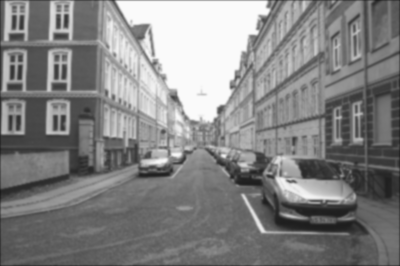

In [ ]:
img = np.array(Gaussian_Blur(np.array(img)))
cv2_imshow(img)

##Gradient Calculation

In [ ]:
def checkGradient(value,length1,length2):
  x = value
  y = length2
  min = x

  if x > int(length2/2):
    min = int(length2/2)
  if x + (length2/2) >= length1:
    y = int(length2/2) + (length1-value)
  
  x = int(length2/2) - min
  return x,y

In [ ]:
def Gradient(matrix):
  matrix_temp = []
  direction_temp = []
  Kx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

  Ky = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
  
  for height in range(len(matrix)):
    temp = []
    temp2 = []
    for width in range(len(matrix[height])):
    
      minWidthImage, maxWidthImage = check(width,len(matrix[height]),int(len(Kx)/2))
      minHeightImage, maxHeightImage = check(height,len(matrix),int(len(Ky)/2))
      minWidthGrad, maxWidthGrad = checkGradient(width,len(matrix[height]),len(Kx))
      minHeightGrad, maxHeightGrad = checkGradient(height,len(matrix),len(Ky))

      Gx = sum(sum(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage] 
                   * Kx[minHeightGrad:maxHeightGrad,minWidthGrad:maxWidthGrad]))
      Gy = sum(sum(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage] 
                   * Ky[minHeightGrad:maxHeightGrad,minWidthGrad:maxWidthGrad]))
      
      temp.append(np.hypot(Gx,Gy))
      temp2.append(np.arctan2(Gy, Gx)*180/np.pi)

    matrix_temp.append(temp)
    direction_temp.append(temp2)
  return matrix_temp, direction_temp

In [ ]:
matrix = np.array([[255,255,255],[255,255,255],[255,255,255]])
gradient, direction = Gradient(matrix)
gradient

[[1081.8733752154178, 1020.0, 1081.8733752154178],
 [1020.0, 0.0, 1020.0],
 [1081.8733752154178, 1020.0, 1081.8733752154178]]

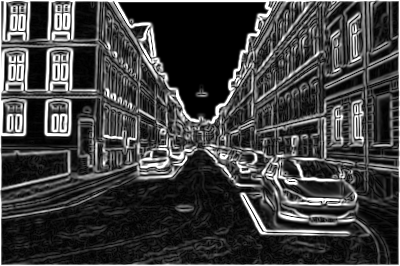

In [ ]:
gradient, direction = np.array(Gradient(np.array(img)))
img = gradient

cv2_imshow(img)

##Non Maximum Suppression

In [ ]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D
    
    for i in range(M):
      for j in range(N):
        try:

          if angle[i,j] < 0:
            angle[i,j]+=180

          q = 255
          r = 255
          
          #angle 0
          if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = img[i, j+1]
            r = img[i, j-1]
          #angle 45
          elif (22.5 <= angle[i,j] < 67.5):
            q = img[i+1, j-1]
            r = img[i-1, j+1]
          #angle 90
          elif (67.5 <= angle[i,j] < 112.5):
            q = img[i+1, j]
            r = img[i-1, j]
          #angle 135
          elif (112.5 <= angle[i,j] < 157.5):
            q = img[i-1, j-1]
            r = img[i+1, j+1]

          if (img[i,j] >= q) and (img[i,j] >= r):
            Z[i,j] = img[i,j]
          else:
            Z[i,j] = 0

        except IndexError as e:
            pass
    
    return Z

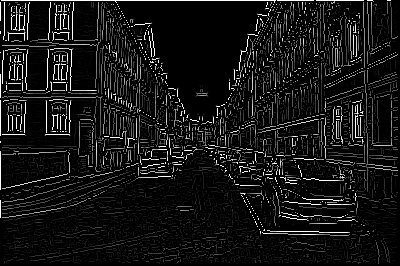

In [ ]:
img = np.array(non_max_suppression(np.array(img),direction))
cv2_imshow(img)

##Pengambangan Low-High

In [ ]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(50)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res

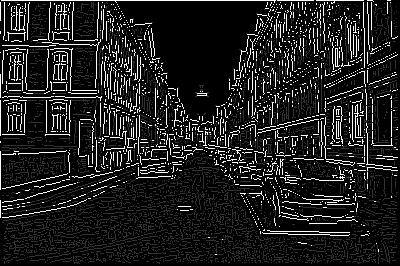

In [ ]:
img = threshold(img)
cv2_imshow(img)

##Edge Tracking

In [ ]:
def hysteresis(img, weak=50, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

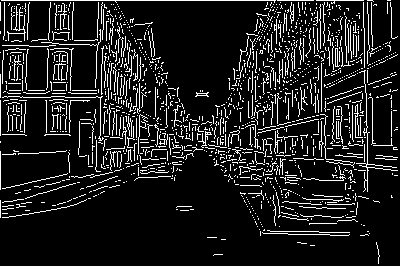

In [ ]:
img = hysteresis(img)
cv2_imshow(img)

##Hasil

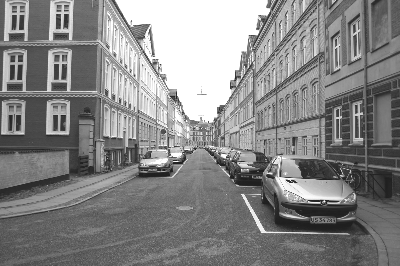

Original Image



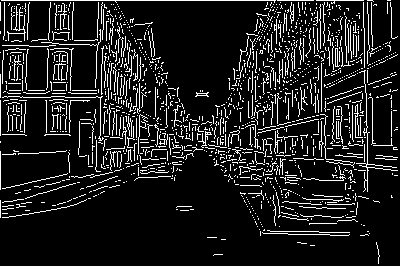

Manual Edge Detection Image



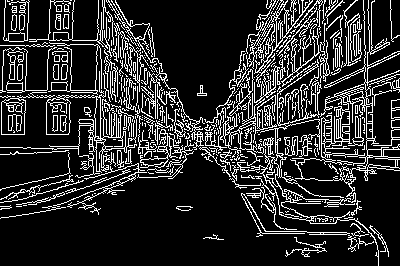

Canny Edge Detection Image



In [ ]:
cv2_imshow(ori)
print("Original Image\n")
cv2_imshow(img)
print("Manual Edge Detection Image\n")
canny = cv.Canny(ori, 50, 255)
cv2_imshow(canny)
print("Canny Edge Detection Image\n")

In [ ]:
height, width = img.shape[0], img.shape[1]

img_similar = 0
edge_similar = 0
value = 0
for row in range(height):
  for data in range(width):
    
    if img[row,data] == canny[row,data]:
        img_similar += 1

    if canny[row,data] == 255:
      value+=1
      if img[row,data] == canny[row,data]:
        edge_similar += 1


print("Tingkat kemiripan manual dan canny :",f"{img_similar*100/(height*width) : .3f}%")
print("Tingkat kemiripan batas gambar manual dan canny:",f"{edge_similar*100/value : .3f}%")

Tingkat kemiripan manual dan canny :  86.469%
Tingkat kemiripan batas gambar manual dan canny:  45.330%


# Uji Coba

In [ ]:
# link = "https://cdn-2.tstatic.net/wartakota/foto/bank/images/jalan-raya-sudirman-kranji1.jpg"
# link = "https://ds393qgzrxwzn.cloudfront.net/resize/m720x480/cat1/img/images/0/lqnre0izAI.jpg"
link = "https://images.freeimages.com/images/large-previews/2f1/street-1512854.jpg"
# link = "https://i.pinimg.com/originals/72/d9/2e/72d92e28c2861ad0c81dfe05d26dc0fa.jpg"
# link = "https://th.bing.com/th/id/R.853e41fc1a4dcd0b93222739975b4464?rik=blL9sM5kuHU8mQ&riu=http%3a%2f%2fwww.spanishfoodfinder.com%2fmandarines.jpg&ehk=PoPsJ5xFr%2bGm%2fSnomzy8S%2byLFyJ9LyLRI%2bLi6yTSpTA%3d&risl=&pid=ImgRaw&r=0"

In [ ]:
int(5/2)

2

In [ ]:
def checkWidth(width,length):
  x = width-2
  y = width+2

  if (width-1) < 0 :
    x = 0
  elif width-2 < 0:
    x = width-1

  if (width+1) >= length:
    y = width
  elif (width+2) >= length:
    y = width+1

  return x,y

def checkHeight(height,length):
  x = height-2
  y = height+2

  if (height-1) < 0 :
    x = 0
  elif height-2 < 0:
    x = height-1

  if (height+1) >= length:
    y = height
  elif (height+2) >= length:
    y = height+1
  
  return x,y

def checkWidthGaussian(width,length):
  x = 0
  y = 6
  
  if width == 0:
    x =  2
  elif width == 1:
    x = 1
  
  if width == length-2:
    y = 4
  elif width == length-1:
    y = 3
  
  return x,y

def checkHeightGaussian(height,length):
  x = 0
  y = 6
  
  if width == 0:
    x =  2
  elif width == 1:
    x = 1
  
  if width == length-2:
    y = 4
  elif width == length-1:
    y = 3
  
  return x,y

In [ ]:
def check(value,length):
  x = value-2
  y = value+2

  if (value-1) < 0 :
    x = 0
  elif value-2 < 0:
    x = value-1

  if (value+1) >= length:
    y = value
  elif (value+2) >= length:
    y = value+1
  
  return x,y+1

In [ ]:
def checkGaussian(value,length1,length2):
  x = 0
  y = length2+1
  
  if value == 0:
    x =  int(length2/2)
  elif value == 1:
    x = int(length2/2) - 1
  
  if value == length1-2:
    y = length2-1
  elif value == length1-1:
    y = length2-2
  return x,y


In [ ]:
def checkGradient(value,length1,length2):
  x = 0
  y = length2+1
  
  if value == 0:
    x =  int(length2/2)
  elif value == 1:
    x = int(length2/2) - 1
  
  if value == length1-2:
    y = length2-1
  elif value == length1-1:
    y = length2-2
  return x,y

In [ ]:
matrix = np.array([[1,2,3,4,5],
                   [6,7,8,9,10],
                   [1,2,3,4,5],
                   [6,7,8,9,10],
                   [1,2,3,4,5]
                   ])

In [ ]:
minWidthImage, maxWidthImage = check(0,len(matrix[0]))
minHeightImage, maxHeightImage = check(0,len(matrix))
minWidthGaus, maxWidthGaus = checkGaussian(0,len(matrix[0]),len(gaussian))
minHeightGaus, maxHeightGaus = checkGaussian(0,len(matrix),len(gaussian))

# print(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage])
# print(gaussian[minHeightGaus:maxHeightGaus,minWidthGaus:maxWidthGaus])
temp = sum(sum(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage]*gaussian[minHeightGaus:maxHeightGaus,minWidthGaus:maxWidthGaus]))
temp

1.566807108251889

In [ ]:
matrix_temp = []
for height in range(len(matrix)):
  temp = []
  for width in range(len(matrix[height])):

    minWidthImage, maxWidthImage = check(width,len(matrix[height]))
    minHeightImage, maxHeightImage = check(height,len(matrix))
    minWidthGaus, maxWidthGaus = checkGaussian(width,len(matrix[height]),len(gaussian))
    minHeightGaus, maxHeightGaus = checkGaussian(height,len(matrix),len(gaussian))

    # print(height,width)
    # print(minWidthImage, maxWidthImage)
    # print(minHeightImage, maxHeightImage)
    # print(minWidthGaus, maxWidthGaus)
    # print(minHeightGaus, maxHeightGaus)
    

    temp.append(sum(sum(matrix[minHeightImage:maxHeightImage,minWidthImage:maxWidthImage]*gaussian[minHeightGaus:maxHeightGaus,minWidthGaus:maxWidthGaus])))
    # print(temp)
    # print("--------------------------------")
  matrix_temp.append(temp)

matrix_temp

[[1.566807108251889,
  2.5105942128269607,
  3.264471863255423,
  3.662595958527665,
  3.012006243225197],
 [2.552625296966144,
  3.9783424224566915,
  5.028930907544175,
  5.53147973294541,
  4.501053505508306],
 [2.716776730246229,
  4.23059201174252,
  5.343049105643745,
  5.873234765043619,
  4.777490522565155],
 [2.552625296966144,
  3.9783424224566915,
  5.028930907544175,
  5.53147973294541,
  4.501053505508306],
 [1.5668071082518893,
  2.5105942128269607,
  3.264471863255423,
  3.6625959585276644,
  3.012006243225197]]